<a href="https://colab.research.google.com/github/BiancadeFrancisco/LogisticRegression_DadosBancarios/blob/main/C%C3%B3pia_de_M%C3%A9tricas_CASE_BANCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VOCÊ RECEBERÁ UMA BASE REFERENTE A EMPRÉSTIMO PESSOAL, ONDE A SUA VARIÁVELTARGET SERÁ Personal_Loan. Faça o treinamento e teste com Logistic Regression e analise cada uma das métricas apresentadas:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
banco = pd.read_excel("/content/Bank_Personal_Loan_Modelling.xlsx")

banco.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [ ]:
# DADOS NULOS:

banco.isna().any()

ID                    False
Age                   False
Experience            False
Income                False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal_Loan         False
Securities_Account    False
CD_Account            False
Online                False
CreditCard            False
dtype: bool

In [ ]:
# DADOS DUPLICADOS:

banco.duplicated().any()

False

In [ ]:
# DISTRIBUIR X E Y:

# Personal_Loan = empréstimo pessoal

X = banco[["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage", "Securities_Account", "CD_Account", "Online", "CreditCard" ]]

y = banco[["Personal_Loan"]].copy()
y = pd.DataFrame(y)


In [ ]:
y.head()

,Personal_Loan
0,0
1,0
2,0
3,0
4,0


In [ ]:
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [ ]:
# FAZER TRAIN TEST SPLIT:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, stratify = y)

In [ ]:
# EXECUTAR ALGORITMO DE CLASSIFICAÇÃO:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

lr = model.fit(X_train, y_train)

y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
X_test.assign(churn=y_test).assign(label=y_pred)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,churn,label
453,54,28,53,4,2.8,2,0,1,0,0,0,0,0
2696,63,37,78,4,1.7,3,0,0,0,1,0,0,0
1288,63,38,129,1,0.9,1,366,0,0,1,0,0,0
2600,42,18,51,3,2.1,3,0,0,0,0,0,0,0
722,45,21,132,3,1.2,2,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4564,58,32,28,2,0.3,1,148,0,0,0,0,0,0
188,64,40,169,2,2.1,1,122,0,0,1,0,0,0
4470,44,20,111,2,5.3,2,0,0,0,1,0,1,0
1802,29,3,121,2,1.3,1,0,0,0,0,0,0,0


In [ ]:
# Importar métricas do módulo sklearn:

from sklearn.metrics import confusion_matrix

In [ ]:
# Execute a função de matriz de confusão em valores reais e previstos

confusion_matrix(y_test, y_pred)

array([[889,  15],
       [ 45,  51]])

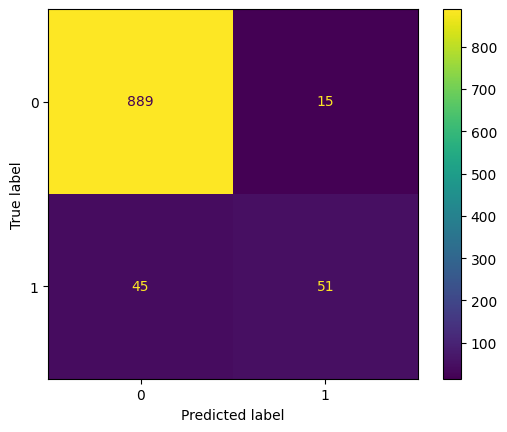

In [ ]:
# PLOTAR MATRIZ CONFUSÃO:

import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
color = "white"
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

In [ ]:
# VERIFICAR MÉTRICAS:

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia Treino: {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Teste: {accuracy_score(y_test, lr.predict(X_test))}")
print("=" *50)
print(f"Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("=" *50)
print(f"Precisão Treino: {precision_score(y_train, lr.predict(X_train))}")
print(f"Precisão Test: {precision_score(y_test, lr.predict(X_test))}")
print("=" *50)
print(f"Recall Treino: {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall Test: {recall_score(y_test, lr.predict(X_test))}")
print("=" *50)
print(f"F1 Treino: {f1_score(y_train, lr.predict(X_train))}")
print(f"F1 Test: {f1_score(y_test, lr.predict(X_test))}")
print("=" *50)
print(f"ROCAUC Treino: {roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])}")
print(f"ROCAUC Test: {roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])}")

Acurácia Treino: 0.94925
Acurácia Teste: 0.94
Acurácia Balanceada Treino: 0.796195151179941
Acurácia Balanceada Teste: 0.7573285398230089
Precisão Treino: 0.8175438596491228
Precisão Test: 0.7727272727272727
Recall Treino: 0.6067708333333334
Recall Test: 0.53125
F1 Treino: 0.6965620328849028
F1 Test: 0.6296296296296297
ROCAUC Treino: 0.9551508630623158
ROCAUC Test: 0.9540929203539823


In [ ]:
metricas = {
    "model": ["Logistic Regression", "Logistic Regression"],
    "modo": ["Treino", "Teste"],
    "accuracy": [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test))],
    "balanced_accuracy": [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test))],
    "f1_score": [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test))]
}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,f1_score
0,Logistic Regression,Treino,0.94925,0.796195,0.696562
1,Logistic Regression,Teste,0.94000,0.757329,0.629630
